# Answers

You can edit this Jupyter notebook to include your answers and run any code that generates those answers or produces plots.  You can add additional cells for code or markdown as needed.

## Problem 0
The Fourier transform, denoted by $\mathcal F$, can be used to solve differential equations. One can show that the Fourier transform of a derivative satisfies
$$\mathcal F\left[f'\right] = i \omega \mathcal F\left[f\right]$$
where the $\omega$ is the variable in the transformed space (i.e. frequency).
The above equation may differ by a constant depending on which convention you're using for the Fourier transform. 

To solve $u$ to the ODE
$u''(x) = g(x)$
on the domain $[0,2\pi]$ with periodic boundary constraints $u(0) = u(2\pi)$ and $g(0) = g(2\pi)$, we observe that
$$- \omega^2 \mathcal F[u]= \mathcal F[g].$$
Therefore 
$$u(x) = \mathcal F^{-1}\left[-\frac{1}{\omega^2}\mathcal F[g](\omega)\right](x).$$


This works great in theory, but often the right-hand side of the above equation is hard to compute in practice.

Instead, we discretize $g(x)$ on $[0,2\pi]$ by evaluating it at $N$ equally spaced points. This gives us a vector $\mathbf g\in\mathbb R^N$. Our goal is to find a vector $\mathbf u\in\mathbb R^N$ that is approximately equal to the evaluation of $u(x)$.
The discrete Fourier transform of $\mathbf g$ is approximately the same as the discretization of $\mathcal F[g]$, and similarly for $u$.

Because $\mathcal F$ is a linear transformation, the discrete Fourier transform of a function can be computed via multiplication of $\mathbf f$ by the appropriate matrix, which takes $O(N^2)$ time. However, in 1965, Cooley and Tukey developed [an algorithm](https://www.ams.org/journals/mcom/1965-19-090/S0025-5718-1965-0178586-1/) for computing the discrete Fourier transform in $O(N \log N)$ time. (The first part of [this webpage](https://www.cmlab.csie.ntu.edu.tw/cml/dsp/training/coding/transform/fft.html) gives a descent explanation of how this algorithm works.) Their fast Fourier transform and its inverse are implemented in `scipy.fft` as `fft` and `ifft`.
$\DeclareMathOperator{\fft}{fft}$

$\DeclareMathOperator{\ifft}{ifft}$
Putting this all together, we get that 
$$\mathbf u \approx \ifft(\;-\frac{1}{\omega^2}\;*\;\fft(\mathbf g)\;).$$

### Part A
Solve $u''(x) = -\sin(x)$ for $u$ with periodic boundary conditions using the Fast Fourier transform. Use $N=50$. Solve the equation analytically as well with $u(0) = u(2\pi) = 0$. Plot the solution you found with the FFT as well as the analytic solution with a legend and title. What is the maximum modulus of error on the evaluation points?  Because the Fourier transform is defined for complex variables, by using the FFT we introduce error by adding a small imaginary part to the solution. What is the largest imaginary value in your solution?

Hint: Because scipy rearranges which $\omega$ corresponds to which entry in the vector, $\fft(\mathbf g)$, you will need to be careful in how you divide by $\omega^2$. For $N$ even, 
- Entries $0$ to $N/2 - 1$ correspond to $\omega = 0,\ldots,N/2 - 1$
- Entries $N/2$ to $N-1$ correspond to $\omega = -N/2, \ldots, -1$.

Also, do not divide by $\omega^2$ for the term corresponding to $\omega = 0$.

### Part B
Solve $u''(x) = \exp(-(x-\pi)^2)$ for $u$ with periodic boundary conditions using the Fast Fourier transform. Use $N=50$. Plot the solution.

## Problem 1

Finding the global or local minimizer for a specific function is an ubiquitous task in applied sciences. Given a potential function $V(x)$,
\begin{equation}
V(x) = (x^2-1)^2 + 0.1*x,
\end{equation}
which is usually referred as the "double-well" potential. As locally convex function, it has two minimizers located in -1 and 1. There are multiple ways to find the minimizers of the function

### Part A
For a convex function or locally convex function, simple [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) with proper initial guess is a good candidate of minimization algorithm. Assume one starts with initial guess $x_0$, the gradient descent algorithm seeks a sequence of points $x_1,x_2,\cdots,x_n$ such that $x_{n}=x_{n-1} - \alpha_{n-1}\nabla V(x_{n-1})$, where $\alpha_{n-1}$ is the step size and $\nabla (x_{n-1})$ is the gradient of the given potential function at the current point. This procedure can also be considered as the **gradient flow** dynamics in the continuous sense:
\begin{equation}
\frac{dx_t}{dt} = -\nabla V(x_t).
\end{equation}
Try to find the minimizers of the double-well potential function by simulating the gradient flow ODE dynamics. Note that different initializations may lead to different minimizers (falling into different potential wells). You can use Scipy's ODE solver [`solve_ipv`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) with your preferred method or the Forward Euler solver you implemented in HW4.

### Part B
Another approach is the Newton's method we have covered in the class. We can also find the minimizers of the function by computing the critical points of its gradient. Write a function to use Newton's method to recover both local minimizers of $V$.

## Problem 2

### Part A
Consider the following stochastic differential equation
\begin{equation}
dX_t = -\nabla V(X_t) dt + \sqrt{2\beta^{-1}} dW_t
\end{equation}
where $X_t\in\mathbb{R}$ is the state of the system, $W_t$ is a one-dimensional Wiener process and $\beta$ is a constant. This process is usually referred as the overdamped Langevin process. 

We can simulate the overdamped Langevin process by discrete-time method. One of the simplest is the Euler-Maruyama ethod with fixed time step. Please read [Euler-Maruyama method](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method) for details. 

Implement the Euler-Maruyama simulator for $\beta=0.5$ and draw an ensemble of $10^4$ independent samples from the standard normal distribution $\mathcal{N}(0,1)$ as our initial samples. Simulate the sample path for each of the samples. Visualize the sample distribution using histograms for $t=0.02,0.06,0.1,0.5$. What do you observe and how do you explain your findings?

### Part B
The Fokker-Planck equation characterizes the evolution of the distribution of the samples. For the overdamped Langevin process discussed above, the corresponding Fokker-Planck equation is given by 
\begin{equation}
\frac{\partial p}{\partial t} = \nabla \cdot (\nabla Vp) + \frac{1}{\beta} \Delta p.
\end{equation}
Show the invariant distribution of the system is given by the Boltzmann-Gibbs distribution
\begin{equation}
p(x) \propto \exp{(-\beta V(x))}.
\end{equation}

### Part C
Solve the 1-dimensional Fokker-Planck PDE for the double-well potential $V$ and $\beta$ on domain $[-3,3]$ using two methods: (1) explicit finite difference scheme and (2) spectral method. More details about the spectral method can be found in [spectral method](https://en.wikipedia.org/wiki/Spectral_method). We can use the standard normal distribution as the initial condition for the PDE: $p(x,0)=\frac{1}{\sqrt{2\pi}} \exp(-\frac{x^2}{2})$ and zero boundary condition $p(-3,t)=p(3,t)=0$.

Please implement PDE solvers for numerical solution of Fokker-Planck equation using both methods. The grid size for the spatial dimension is fixed to be $\Delta x=0.05$. Note that $\Delta t$ should be sufficiently small to ensure numerical stability in explicit schemes. 

Show the time evolution of the distribution by plotting solutions $p(\cdot,t)$ for $t=0.02,0.06,0.1,0.5$. Compare the solution $p(x,t)$, the Boltzmann-Gibbs distribution and the histograms you obtained from the samples. What do you find?

Hint: For finite difference method, constructing a **sparse** finite difference matrix $M$ can greatly reduce the computational complexity. After each update, normalize the solution $p(x,t)$ to ensure numerically $\int_{-3}^{3}p(x,t)dx=1$.

# Problem 4

[Diffusion map](https://en.wikipedia.org/wiki/Diffusion_map) is another powerful dimensionality reduction method like PCA, MDS and ISOMAP. `one_image.npy` contains one image in the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The following code generates 1000 random rotations of the image. Implement the diffusin map method to extract the 2-dimensional embedding of the digit rotations. Visualize the resulted embedding using the scatter plot.

Hint: Feel free to play with the choice of kernel, number of nearest neighbors to construct the similarity matrix and normalizing parameter $\alpha$.

In [24]:
import numpy as np
import scipy.linalg as la
from skimage.transform import rotate
import matplotlib.pyplot as plt
%matplotlib inline

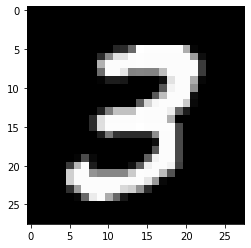

In [25]:
x = np.load('one_image.npy')
plt.imshow(x.reshape((28, 28)), cmap='gray')

In [26]:
# Generate 1000 random rotations of the same image
X   = np.zeros((1000,28*28))
tmp = x.reshape((28, 28))
for i in range(1000):
    X[i,:] = rotate(tmp, np.random.uniform(0,360)).reshape((1,-1))
X   = X/255

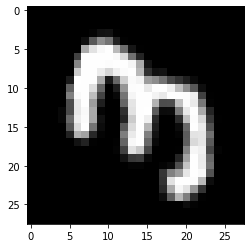

In [28]:
plt.imshow(X[1,:].reshape((28, 28)), cmap='gray')